## Facetting histograms by subsets of data

* https://seaborn.pydata.org/examples/faceted_histogram.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

plt.style.use('seaborn')
sns.set(style="darkgrid")

In [2]:
tips = sns.load_dataset("tips")
tips.shape

(244, 7)

In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [5]:
bins = np.linspace(0, 60, 13)
bins

array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.])

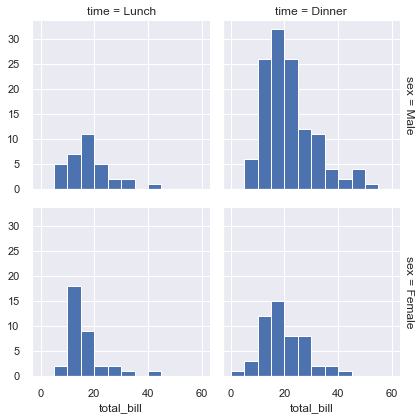

In [6]:
g = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
g.map(plt.hist, "total_bill", bins=bins)

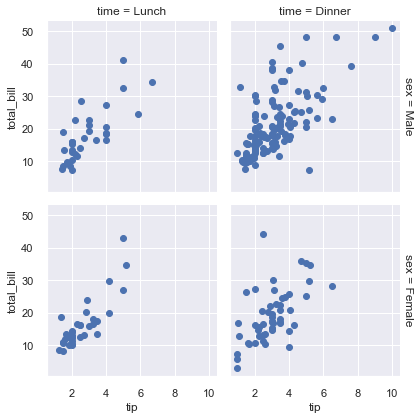

In [7]:
g = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
g.map(plt.scatter, "tip", "total_bill")

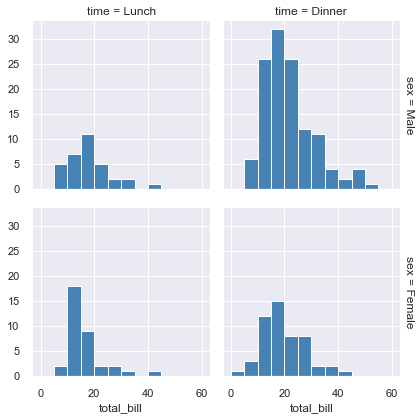

In [8]:
g = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color="steelblue", bins=bins)

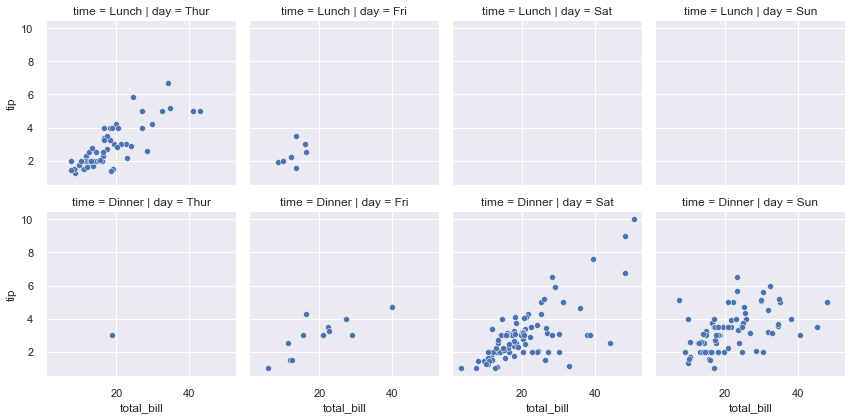

In [9]:
g = sns.FacetGrid(tips, row="time", col="day")
g.map(sns.scatterplot, "total_bill", "tip")

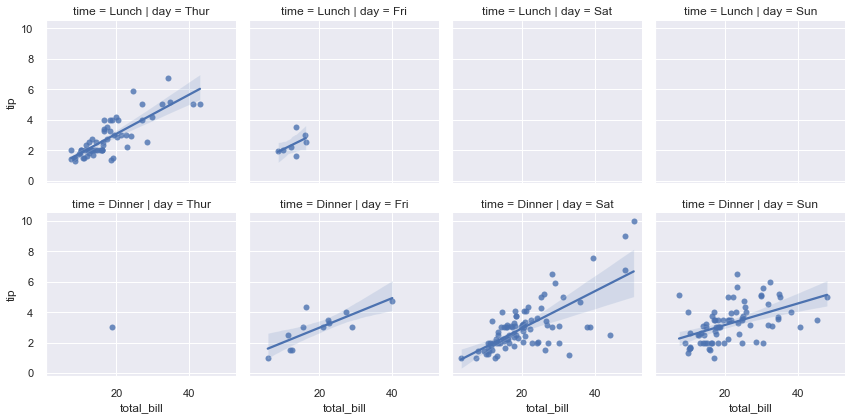

In [10]:
g = sns.FacetGrid(tips, row="time", col="day")
g.map(sns.regplot, "total_bill", "tip")

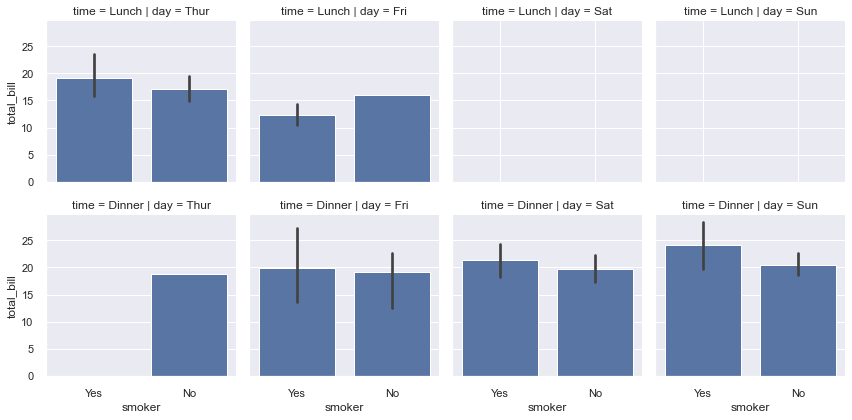

In [11]:
g = sns.FacetGrid(tips, row="time", col="day")
g.map(sns.barplot, "smoker", "total_bill")

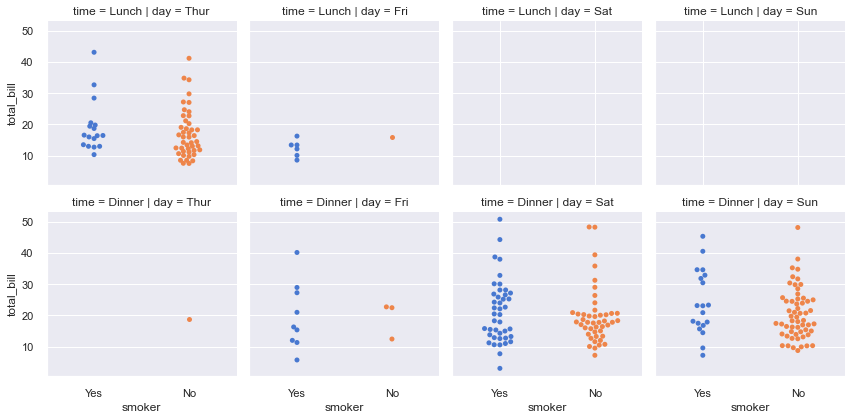

In [12]:
g = sns.FacetGrid(tips, row="time", col="day")
g.map(sns.swarmplot, "smoker", "total_bill", palette="muted")

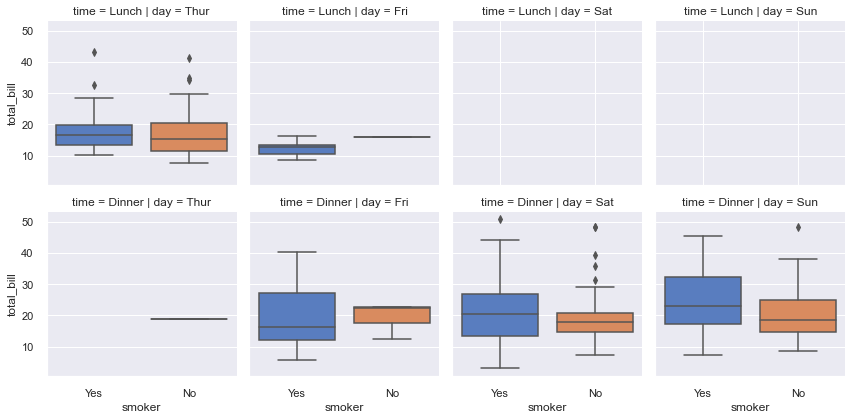

In [13]:
g = sns.FacetGrid(tips, row="time", col="day")
g.map(sns.boxplot, "smoker", "total_bill", palette="muted")

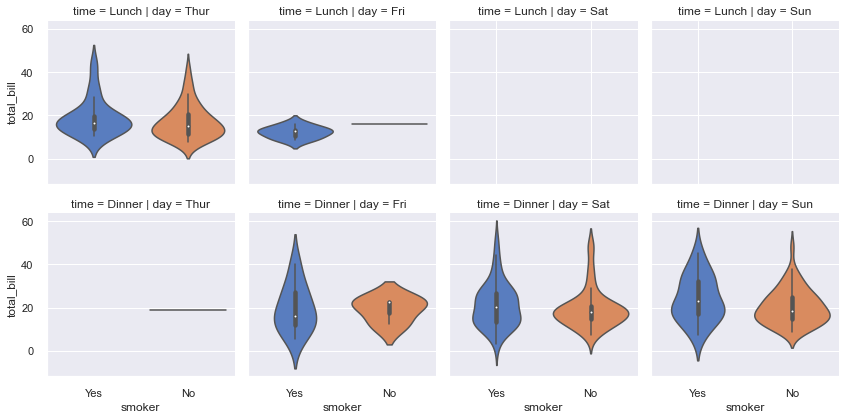

In [14]:
g = sns.FacetGrid(tips, row="time", col="day")
g.map(sns.violinplot, "smoker", "total_bill", palette="muted")

In [15]:
tips.pivot_table(index="time", columns="day", 
                 values="total_bill", aggfunc="count")

day,Thur,Fri,Sat,Sun
time,,,,
Lunch,61,7,0,0
Dinner,1,12,87,76


In [16]:
c = pd.crosstab(tips["time"], tips["day"])
c

day,Thur,Fri,Sat,Sun
time,,,,
Lunch,61,7,0,0
Dinner,1,12,87,76


In [17]:
n = pd.crosstab(tips["time"], tips["day"], normalize=True)
n

day,Thur,Fri,Sat,Sun
time,,,,
Lunch,0.250000,0.028689,0.000000,0.000000
Dinner,0.004098,0.049180,0.356557,0.311475


<AxesSubplot:xlabel='day', ylabel='time'>

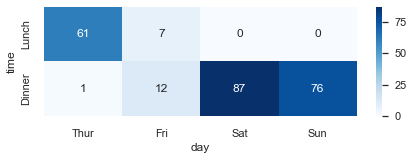

In [18]:
plt.figure(figsize=(7, 2))
sns.heatmap(c, annot=True, cmap="Blues")

<AxesSubplot:xlabel='day', ylabel='time'>

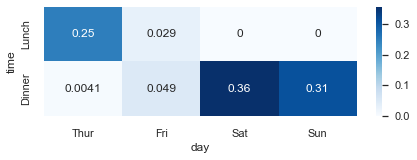

In [19]:
plt.figure(figsize=(7, 2))
sns.heatmap(n, annot=True, cmap="Blues")